In [1]:
import numpy as np

# Linear Regression

In [2]:
class Linear_Regression:
    # initialising  the parameters (learning rate and no. of parameters)
    def __init__(self, learning_rate, no_of_iterations):
        self.learning_rate = learning_rate
        self.no_of_iterations = no_of_iterations

    def fit(self, X, Y):
        # number of data points (m) and number of features (n)
        self.m, self.n = X.shape    # number of rows and columns

        # initiating weights and bias
        self.w = np.zeros(self.n)
        self.b = 0
        self.X = X
        self.Y = Y

        # implementing gradient descent
        for i in range(self.no_of_iterations):
            self.update_weights()

    def update_weights(self):
        y_prediction = self.predict(self.X)

        # calculate gradient
        dw = -(2*self.X.T).dot(self.Y - y_prediction)/self.m
        db = -2 * np.sum(self.Y - y_prediction) / self.m

        # updating the weights
        self.w = self.w - self.learning_rate*dw
        self.b = self.b - self.learning_rate*db

    def predict(self, x):
        return x.dot(self.w) + self.b

## using linear regression for preediction

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [4]:
df = pd.read_csv(r"C:\Users\22213\OneDrive\Desktop\CSV\salary_data.csv")

In [5]:
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [6]:
x = df.iloc[:,:-1]
y = df.iloc[:,1]

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.33,random_state=2)

In [8]:
model = Linear_Regression(learning_rate=0.02, no_of_iterations=1000)

In [9]:
model.fit(x_train, y_train)

### printing the parameter values

In [10]:
print('weight = ', model.w[0])
print('bias = ', model.b)

weight =  9514.400999035135
bias =  23697.406507136307


## predicting the salary value

In [11]:
test_data_pred = model.predict(x_test)

In [12]:
print(test_data_pred)

1      36066.127806
0      34163.247606
14     66512.211003
9      58900.690204
21     91249.653600
19     80783.812501
23    101715.494699
6      52240.609504
3      42726.208505
20     88395.333301
dtype: float64


## visualising the predicted and actual values

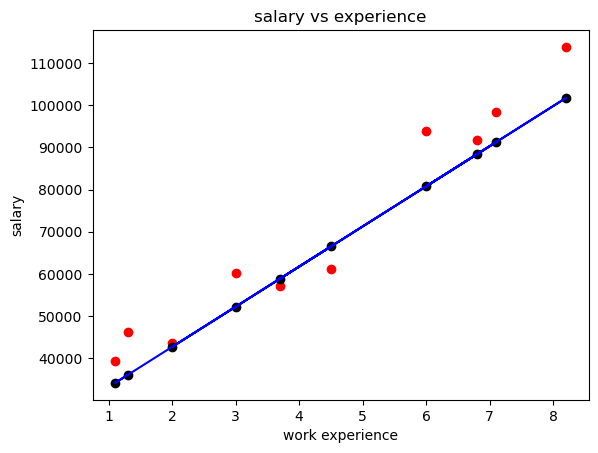

In [22]:
plt.scatter(x_test, y_test, color='red')
plt.plot(x_test, test_data_pred, color='blue')
plt.scatter(x_test ,test_data_pred,color='black')
plt.xlabel('work experience')
plt.ylabel('salary')
plt.title('salary vs experience')
plt.show()